In [1]:

!pip install scikit-learn==0.23.1


     |████████████████████████████████| 6.9MB 4.7MB/s eta 0:00:01    |▍                               | 81kB 4.4MB/s eta 0:00:02     |██▋                             | 563kB 3.0MB/s eta 0:00:03     |████▋                           | 993kB 3.0MB/s eta 0:00:02     |██████                          | 1.3MB 3.0MB/s eta 0:00:02     |███████▋                        | 1.6MB 3.0MB/s eta 0:00:02     |███████████████▍                | 3.3MB 3.0MB/s eta 0:00:02
     |████████████████████████████████| 307kB 19.6MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

df = pd.read_csv('loan_train.csv')
df.drop(['Unnamed: 0', 'Unnamed: 0.1'] ,axis='columns', inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [2]:
#How many of each class is in the dataset
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [3]:
df.columns

Index(['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
       'age', 'education', 'Gender'],
      dtype='object')

In [4]:
#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
#(dates columns are not considered)

X = df[['Principal', 'terms', 'age', 'education', 'Gender']].values  #.astype(float)
X[0:5]

array([[1000, 30, 45, 'High School or Below', 'male'],
       [1000, 30, 33, 'Bechalor', 'female'],
       [1000, 15, 27, 'college', 'male'],
       [1000, 30, 28, 'college', 'female'],
       [1000, 30, 29, 'college', 'male']], dtype=object)

In [5]:
#As we note, some of the features are string, so we need to convert them.
#Let's start with "Gender" and "loan_status":

df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [6]:
#How about education?
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [7]:
#We can use one hot encoding technique to conver categorical varables to binary variables and append them to the 
#feature Data Frame

Feature = df[['Principal','terms','age','Gender']]
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
Feature.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,1,0,0
1,1000,30,33,1,1,0,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,0,0,0,1
4,1000,30,29,0,0,0,0,1


In [8]:
#Now..
X = Feature.values
#Normalize data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y = df['loan_status'].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


The best accuracy was with 0.8 with k= 13


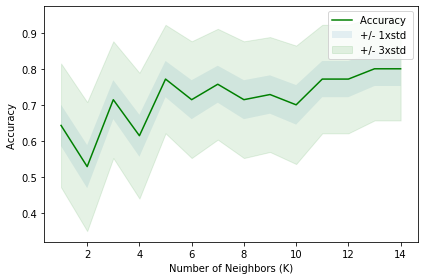

In [10]:
#Classification with K_NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

#Visualize the best accuracy in a plot
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
#In multilabel classification, accuracy classification score is a function that computes subset accuracy. 
#This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels 
#and predicted labels are matched in the test set.

In [11]:
# Building the model again, using k=13
from sklearn.neighbors import KNeighborsClassifier
k = 13
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
yhat = kNN_model.predict(X_test)
#Compare prediction to the actual value
print(yhat[0:10])
print(y_test[0:10])
#Evaluate the model
print("Jaccard_score: ", jaccard_score(y_test, yhat, pos_label = 'PAIDOFF'))
print("F1_score: ", f1_score(y_test, yhat, average='weighted'))

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Jaccard_score:  0.7971014492753623
F1_score:  0.7237903225806451


In [12]:
#Classification Decision tree
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dec_tree.fit(X_train,y_train)
pred_tree = dec_tree.predict(X_test)
#Compare prediction to the actual value
print(pred_tree[0:10])
print(y_test[0:10])
#Evaluate the model
print("Jaccard_score: ", jaccard_score(y_test, yhat, pos_label = 'PAIDOFF'))
print("F1_score: ", f1_score(y_test, yhat, average='weighted'))

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Jaccard_score:  0.7971014492753623
F1_score:  0.7237903225806451


In [13]:
#Classification Support Vector Machine
from sklearn import svm

model = svm.SVC(kernel='rbf', probability = True)
model.fit(X_train, y_train) 
yhat = model.predict(X_test)
yhat_prob = model.predict_proba(X_test)
#Compare prediction to the actual value
print(yhat[0:10])
print(y_test[0:10])
#Evaluate the model
print("Jaccard_score: ", jaccard_score(y_test, yhat, pos_label = 'PAIDOFF'))
print("F1_score: ", f1_score(y_test, yhat, average='weighted'))
print("log_loss: ", log_loss(y_test, yhat_prob))

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Jaccard_score:  0.7857142857142857
F1_score:  0.6914285714285714
log_loss:  0.5265757301242588


In [14]:
#Classification with Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
#predict_proba returns estimates for all classes, ordered by the label of classes. 
#So, the first column is the probability of class "PAIDOFF", and second column is probability of class "COLLECTION"
yhat_prob = LR.predict_proba(X_test)
print(yhat_prob)
print(yhat[0:10])
print(y_test[0:10])

[[0.4351017  0.5648983 ]
 [0.38272792 0.61727208]
 [0.40002151 0.59997849]
 [0.44830788 0.55169212]
 [0.42327858 0.57672142]
 [0.4098349  0.5901651 ]
 [0.42015009 0.57984991]
 [0.41026141 0.58973859]
 [0.44830788 0.55169212]
 [0.42533504 0.57466496]
 [0.44327682 0.55672318]
 [0.43325052 0.56674948]
 [0.32118431 0.67881569]
 [0.44262379 0.55737621]
 [0.36634667 0.63365333]
 [0.33592661 0.66407339]
 [0.45521762 0.54478238]
 [0.40065687 0.59934313]
 [0.43825736 0.56174264]
 [0.41767158 0.58232842]
 [0.37101053 0.62898947]
 [0.43075213 0.56924787]
 [0.44513719 0.55486281]
 [0.39443399 0.60556601]
 [0.33183405 0.66816595]
 [0.44011332 0.55988668]
 [0.44262379 0.55737621]
 [0.29690127 0.70309873]
 [0.44076558 0.55923442]
 [0.33120517 0.66879483]
 [0.40065687 0.59934313]
 [0.38779013 0.61220987]
 [0.39239452 0.60760548]
 [0.420795   0.579205  ]
 [0.31499726 0.68500274]
 [0.39091767 0.60908233]
 [0.43825736 0.56174264]
 [0.38120293 0.61879707]
 [0.37993995 0.62006005]
 [0.39403693 0.60596307]


              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        15
     PAIDOFF       0.79      1.00      0.88        55

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

Confusion matrix, without normalization
[[ 0 15]
 [ 0 55]]


/home/tania/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


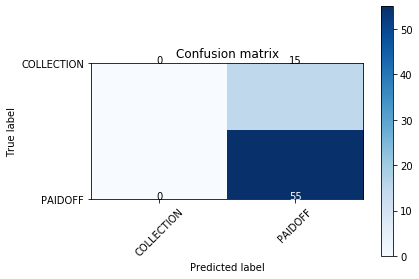

In [15]:
#Evaluation of the logistic regression:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION', 'PAIDOFF'], normalize= False,  title='Confusion matrix')

In [16]:
print("Jaccard_score: ", jaccard_score(y_test, yhat, pos_label = 'PAIDOFF'))
print("F1_score: ", f1_score(y_test, yhat, average='weighted'))
print("log_loss: ", log_loss(y_test, yhat_prob))

Jaccard_score:  0.7857142857142857
F1_score:  0.6914285714285714
log_loss:  0.6025211110710316
